<a href="https://colab.research.google.com/github/jrakhshanda/Bayesian-Methods/blob/master/Information_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Co-occurance on Cancer Dataset
[github](https://github.com/luntos/bianalyzer)

In [ ]:
!pip uninstall spacy 
!pip install -U spacy==2.3.0 
!pip install  scispacy==v0.2.5
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_lg-0.2.5.tar.gz

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_jnlpba_md-0.2.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bionlp13cg_md-0.2.4.tar.gz 
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz 

In [3]:
mkdir temp 

In [4]:
cd temp

/content/temp


In [5]:
!git clone https://github.com/huggingface/neuralcoref.git

Cloning into 'neuralcoref'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 764 (delta 5), reused 3 (delta 1), pack-reused 748
Receiving objects: 100% (764/764), 67.84 MiB | 22.40 MiB/s, done.
Resolving deltas: 100% (402/402), done.


In [6]:
cd neuralcoref

/content/temp/neuralcoref


In [7]:
!pip install -r requirements.txt

In [8]:
!pip install -e .

Obtaining file:///content/temp/neuralcoref
     |████████████████████████████████| 133kB 7.2MB/s 
     |████████████████████████████████| 7.3MB 15.5MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
ERROR: botocore 1.20.13 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Running setup.py develop for neuralcoref


In [9]:
import spacy
import scispacy
import neuralcoref
from spacy import displacy
import en_core_web_sm
import en_core_sci_lg
import en_ner_jnlpba_md
import en_ner_bionlp13cg_md
import en_ner_bc5cdr_md


from scispacy.abbreviation import AbbreviationDetector
from scispacy.linking import EntityLinker
from collections import OrderedDict,Counter


from IPython.display import clear_output
clear_output() 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import wordnet

import regex as re
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize, sent_tokenize,RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import pickle
import os
from os.path import isfile, join
import string

#for vectorizing
nltk.download('stopwords')
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import nltk
from nltk import bigrams
import itertools 

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn import feature_extraction
import re
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols.extend(['lightcoral','violet'])

import networkx as nx
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#comment this out if you're not able to view any of the print lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

from IPython.display import clear_output
clear_output() 

In [3]:
def save_object(path, filename, obj):
    print('Saving Object')
    path_file = join(path, filename)    
    pickle.dump(obj, open(path_file, 'wb'))
    print('Save complete')

def load_object(path, filename):
    print('Attempting to Load Object')
    path_file = join(path, filename)    
    obj = pickle.load(open(path_file, "rb" ))
    print('Load complete')
    return obj

def save_csv(path, filename, dataframe):
    print('Saving Dataframe to CSV')
    path_file = join(path, filename)    
    dataframe.to_csv(path_file, index=False)

def load_csv(path, filename):
    print('Loading Dataframe From CSV')
    path_file = join(path, filename)
    dataframe = pd.read_csv(path_file)
    return dataframe

## Data

In [19]:
df = pd.read_csv('/content/drive/MyDrive/cancer_data/cancer_gene_repair.zip', compression='zip', header=0)
df = df.loc[:,~df.columns.str.match("Unnamed")]
topics = pd.read_csv('/content/drive/MyDrive/cancer_data/dominant_topics')

In [32]:
df = df.fillna(' ')
df['Title'] = df['Title'].astype('string')
df['Abstract'] = df['Abstract'].astype('string')
df['MeSH'] = df['MeSH'].astype('string')
df['Text'] = df['Title'] + '. ' + df['Abstract']
df.Text = df.Text.astype('string')
df['Topic'] = topics['Dominant_Topic']
df['Topic'] = topics['Dominant_Topic'].astype('int')
df.head()

,PMID,Title,Abstract,MeSH,year,Text,Topic
0,33609766,Role of NAD(+) in regulating cellular and meta...,BACKGROUND: Nicotinamide adenine dinucleotide ...,,2021,Role of NAD(+) in regulating cellular and meta...,0
1,33609625,What can clinical immunology learn from inborn...,The epigenome is at the interface between envi...,,2021,What can clinical immunology learn from inborn...,1
2,33609553,Development of hMC1R Selective Small Agonists ...,Activation of the human melanocortin 1 recepto...,,2020,Development of hMC1R Selective Small Agonists ...,0
3,33609447,Strong functional data for pathogenicity or ne...,Determination of the clinical relevance of rar...,,2021,Strong functional data for pathogenicity or ne...,1
4,33608585,Modulating the unfolded protein response with ...,Prostate cancer (PCa) is the most common non-c...,,2021,Modulating the unfolded protein response with ...,0


In [21]:
df.dtypes

PMID         int64
Title       string
Abstract    string
MeSH        string
year        object
Text        string
Topic        int64
dtype: object

### Visualizations

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Topic')

Text(0, 0.5, 'Articles')

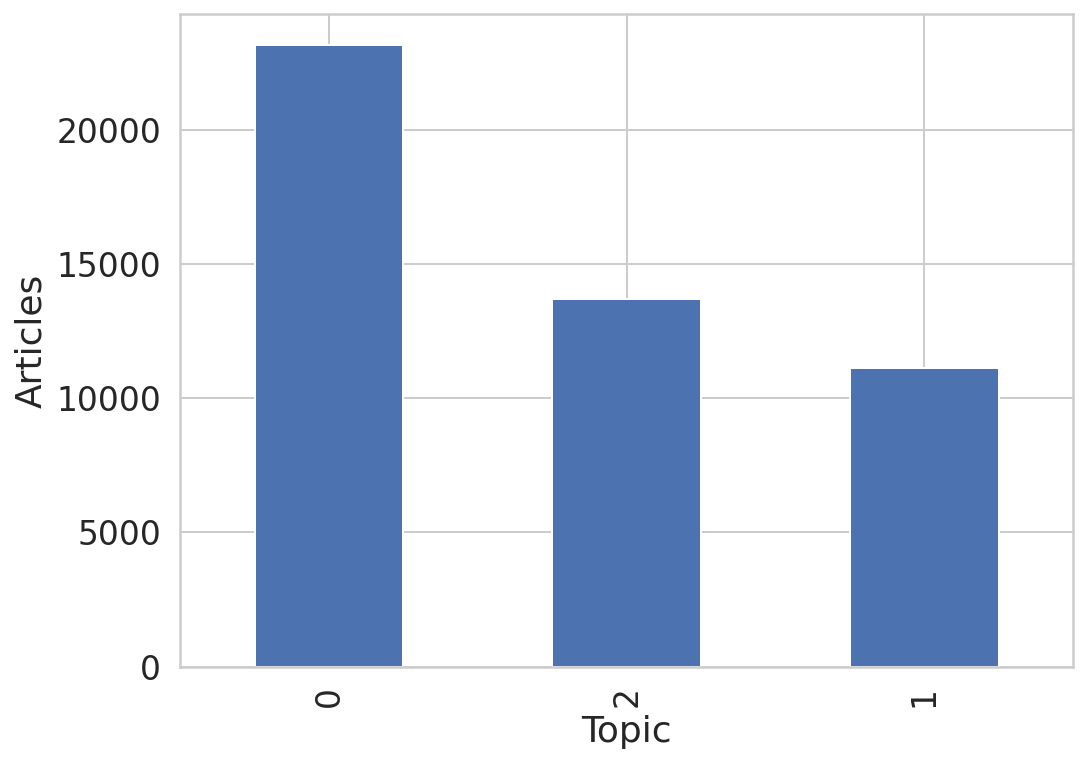

In [7]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,6))
df['Topic'].value_counts().plot(kind='bar')
plt.xlabel("Topic")
plt.ylabel("Articles")
plt.show()

we are specifically intrested in topic 1.

In [ ]:
data = df[df['Topic']==1]
print(data.shape)
data.sample(13)

# Information Extraction

### Step 1: Coreference resolution
As mentioned, the coreference resolution tries to find all expressions in the text that refer to a specific entity. In my implementation, I have used the [Neuralcoref model from Huggingface](https://github.com/huggingface/neuralcoref) that runs on top of the SpaCy framework. I have used the default parameters of the Neuralcoref model. One thing I did notice along the way is that the Neuralcoref model doesn’t work well with location pronouns.

In [ ]:
# basic model 
nlp = en_core_sci_lg.load()
neuralcoref.add_to_pipe(nlp)
doc = nlp(df['Text'][1])
displacy_image = displacy.render(doc, jupyter = True, style = 'ent')
img = displacy.render(next(doc.sents), style='dep', jupyter=True)

In [19]:
def coref_resolution(text, model):
    """Function that executes coreference resolution on a given text"""
    doc = model(text)
    # fetches tokens with whitespaces from spacy document
    tok_list = list(token.text_with_ws for token in doc)
    for cluster in doc._.coref_clusters:
        # get tokens from representative cluster name
        cluster_main_words = set(cluster.main.text.split(' '))
        for coref in cluster:
            if coref != cluster.main:  # if coreference element is not the representative element of that cluster
                if coref.text != cluster.main.text and bool(set(coref.text.split(' ')).intersection(cluster_main_words)) == False:
                    # if coreference element text and representative element text are not equal and none of the coreference element words are in representative element. This was done to handle nested coreference scenarios
                    tok_list[coref.start] = cluster.main.text + \
                        doc[coref.end-1].whitespace_
                    for i in range(coref.start+1, coref.end):
                        tok_list[i] = ""

    return "".join(tok_list)

In [ ]:
coref_resolution(df['Abstract'][1],nlp)

In [ ]:
df['Abstract'][1]

# Step 2: Named Entity Linking

In [14]:
nlp_bi = en_ner_bionlp13cg_md.load()
nlp_jn = en_ner_jnlpba_md.load()
nlp_bc5 = en_ner_bc5cdr_md.load()

In [41]:
data = nltk.tokenize.sent_tokenize(' '.join(df['Abstract']))

In [51]:
data[10:20]

['Epigenetic modifications play a crucial role in establishing and maintaining cell identity and are especially crucial for neurology, musculoskeletal integrity, and the function of the immune system.',
 'Mutations in genes encoding for the components of the epigenetic machinery lead to the development of distinct disorders, especially involving the central nervous system and host defense.',
 'In this review, we focus on the role of epigenetic modifications for the function of the immune system.',
 'By studying the immune phenotype of patients with monogenic mutations in components of the epigenetic machinery (Inborn Errors of Epigenetic regulators, IEE), we demonstrate the importance of DNA methylation, histone modifications, chromatin remodeling, non-coding RNAs, and mRNA processing for immunity.',
 'Moreover, we give a short overview on therapeutic strategies targeting the epigenome.',
 'Activation of the human melanocortin 1 receptor (hMC1R) expressed on melanocytes by alpha-melano

In [52]:
def entities_extract(model,df):
  """ A function that returns a tuple of displacy image of named or unnamed word entities and
      a set of unique entities recognized based on scispacy model in use
      Args: 
      model: A pretrained model from spaCy or ScispaCy document: daframe containing data"""
  
  ENTITY_TYPES = ["GENE_OR_GENE_PRODUCT", "CANCER"]
  #neuralcoref.add_to_pipe(model)
  table= {'Sentence':[], 'Entity':[], 'Class':[]}
  for text in df:
    doc = model(text)
    for X in doc.ents:
      if X.label_ in ENTITY_TYPES:
        if X.text != 'cancer' and X.text != 'DNA'and X.text != 'RNA' and X.text != 'Cancer':
          table['Sentence'].append(text)
          table['Entity'].append(X.text)
          table['Class'].append(X.label_)

  
  return pd.DataFrame(table)

In [55]:
d = entities_extract(model=nlp_bi,df=data[20:30]) 
d = d.drop_duplicates()

In [58]:
d

,Sentence,Entity,Class
0,These analogs should be efficacious for preven...,skin cancer,CANCER
1,These analogs should be efficacious for preven...,melanoma,CANCER
2,Determination of the clinical relevance of rar...,VUSs,GENE_OR_GENE_PRODUCT
3,Determination of the clinical relevance of rar...,BRCA2 cancer,GENE_OR_GENE_PRODUCT
4,"However, laboratory-based functional data deri...",VUSs,GENE_OR_GENE_PRODUCT
5,We evaluated 252 missense VUSs from the BRCA2 ...,VUSs,GENE_OR_GENE_PRODUCT
6,We evaluated 252 missense VUSs from the BRCA2 ...,BRCA2,GENE_OR_GENE_PRODUCT
7,Of the 186 missense variants observed by the t...,VUSs,GENE_OR_GENE_PRODUCT
8,"However, after applying protein functional dat...",VUSs,GENE_OR_GENE_PRODUCT
9,These results indicate that validated function...,VUS,CANCER


In [58]:
df_bc5 = pd.concat([df_bc5,df_bc52], axis=0)

In [47]:
df_bc5.to_csv('df_bc5.csv')
save_csv('/content/drive/MyDrive/cancer_data','df_bc5.csv',df_bc5)

Saving Dataframe to CSV


In [49]:
print(df_ents.shape)
df_ents = df_ents.drop_duplicates()
df_ents.head(20)

(160528, 3)


,PMID,Entity,Class
0,33609766,NAD(+)/NADH,GENE_OR_GENE_PRODUCT
2,33609625,histone,GENE_OR_GENE_PRODUCT
3,33609553,hMC1R,GENE_OR_GENE_PRODUCT
5,33609553,alpha-melanocortin,GENE_OR_GENE_PRODUCT
6,33609553,alpha-MSH,GENE_OR_GENE_PRODUCT
10,33609553,LK-514 (5),GENE_OR_GENE_PRODUCT
11,33609553,melanocortin receptors,GENE_OR_GENE_PRODUCT
12,33609553,hMC3R,GENE_OR_GENE_PRODUCT
13,33609553,hMC4R,GENE_OR_GENE_PRODUCT
14,33609553,hMC5R,GENE_OR_GENE_PRODUCT


# Creating Pattern Matric using TF-IDF vectorizer

In [12]:
nlp = en_core_sci_lg.load()
# nlp.Defaults.stop_words |= {'type','wild','function','observed','results','different','identified','from','furthermore','process','model','effect','known','suggest','damage','human',
#                             'rat','rats','suggested','conclusion','determined','indicate','Moreover','system', 'form', 'treatment','disease','although','conclusion','including',
#                             'exposure','repair','injury','cell','functions','compared','interaction','level','demonstrated','studies','substrate','interaction','shown','contrast',
#                             'presence','important', 'response','cells', 'effect','risk','induction', 'increase', 'also', 'breaks','treated','showed','used','comet', 'affect', 'may', 
#                             'two','study','gene','end','ends','let','double','single','strands','stress','cross','pathway','role','demonstrate','present','result','use','occur','appear',
#                             'joining','affect','cause','induce','defect','induced','lead','complex','resistance','calls','ber','mutagenic','frquency', 'analyzed','include','similar','studied',
#                             'method','addition','suggesting','background','gene','expression','investigated','promote','types','dna','proteins','protein', 'ner','genomic','involved','high','low',
#                             'agents','using','strands','cycle','drug','investigate','increased','that','induce','structure','bindings','binding','molecular','mouse','mice','activity','sequences',
#                             'factors','processes','levels','level','patient','patients','dose','recombination','yeast','strand','mutants','mutations','replications','homologous','genetic',
#                             'genes','associative','lung', 'therapy','inhibitors','specific','light','molecular','binding','sequence','lines','cancer','poly','inhibitation','activation','nuclear',
#                             'regulation','tumor','mismatch','excision','base','found','containing','related','coli','cellular','growth','irridation','tumors','mutations','transription','resistance',
#                             'site','adducts','dose','enzyme','associated','analysis','species','tissue', 'promoter','time','pathways','factor','domain','clinical','cancers','liver','assay','irradiated',
#                             'irradiation','nucleotide','one','damage','increase','resist','mechanism','association','group','groups','aging','exposed', 'show','rna', 'radiation','strains','chromosome',
#                             'break','sequence','mutant','however','frequency','synthesis','mutagenic','mutagenesis', 'trnscriptor','replication','dependent','mutation','genome','new','beta',
#                             'chromosme','dependent','syndrome','radiation','effects','inhibition','genomic','chromosomal','histone','involved','process','factor','factors','effect','found',
#                             'therapy','gamma','mediated','instability','pathways','deficient','genotype','significant','mechanisms','required','nhej', 'radiation','strains','chromosome',
#                             'sequence','mutant','however','frequency','synthesis','mutagenic','mutagenesis','trnscriptor','replication','dependent','mutation','genome','chromosme','dependent',
#                             'syndrome','radiation','effects','inhibition''stranded','genome','non','target','formation','checkpoint','age','animal','decrease','day','change','product','strain',
#                             'development','approach','decrease','editing','repair','replication','link','involve','disorder','immune','study','rna','dna','mrna','patient','target'}

In [13]:
def preprocess(text):
    # TODO: Replace the next line with your own code.
    remove = string.punctuation
    remove = remove.replace("-", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    text = re.sub(pattern, "", text) 
    doc = nlp(text)
    token_words = []
    for token in doc:
      if not token.is_stop:
        token_words.append(token.lemma_)
    return token_words

In [60]:
vectorizer = TfidfVectorizer(tokenizer = preprocess,max_df=0.95,min_df=2)
X = vectorizer.fit_transform(df['Text'][0:20000])
vocabulary = vectorizer.vocabulary_
feature_names = vectorizer.get_feature_names()

In [59]:
X.shape

(47941, 55756)

# Most Similar Words and Ontologies

In [115]:
def most_similar(query, n,nlp=nlp_bc5):
  query = np.array([query])
  most_similar_keys = nlp.vocab.vectors.most_similar(query, n=n)[0].flatten()
  most_similar_words = []
  for key in most_similar_keys:
      most_similar_words.append(nlp.vocab[key])
  return most_similar_words

In [116]:
def plot_most_similar(lst,n,nlp):
  sim_words = np.array([most_similar(nlp.vocab[w].vector,n=n) for w in lst])
  # find tsne coords for 2 dimensions
  vectors = np.array([item.vector for item in sim_words.flatten()])
  tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(vectors)
  labels = np.array([item.text for item in sim_words.flatten()])
  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  # display scatter plot
  plt.scatter(x_coords, y_coords)
  for label, x, y in zip(labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
  return plt.show()

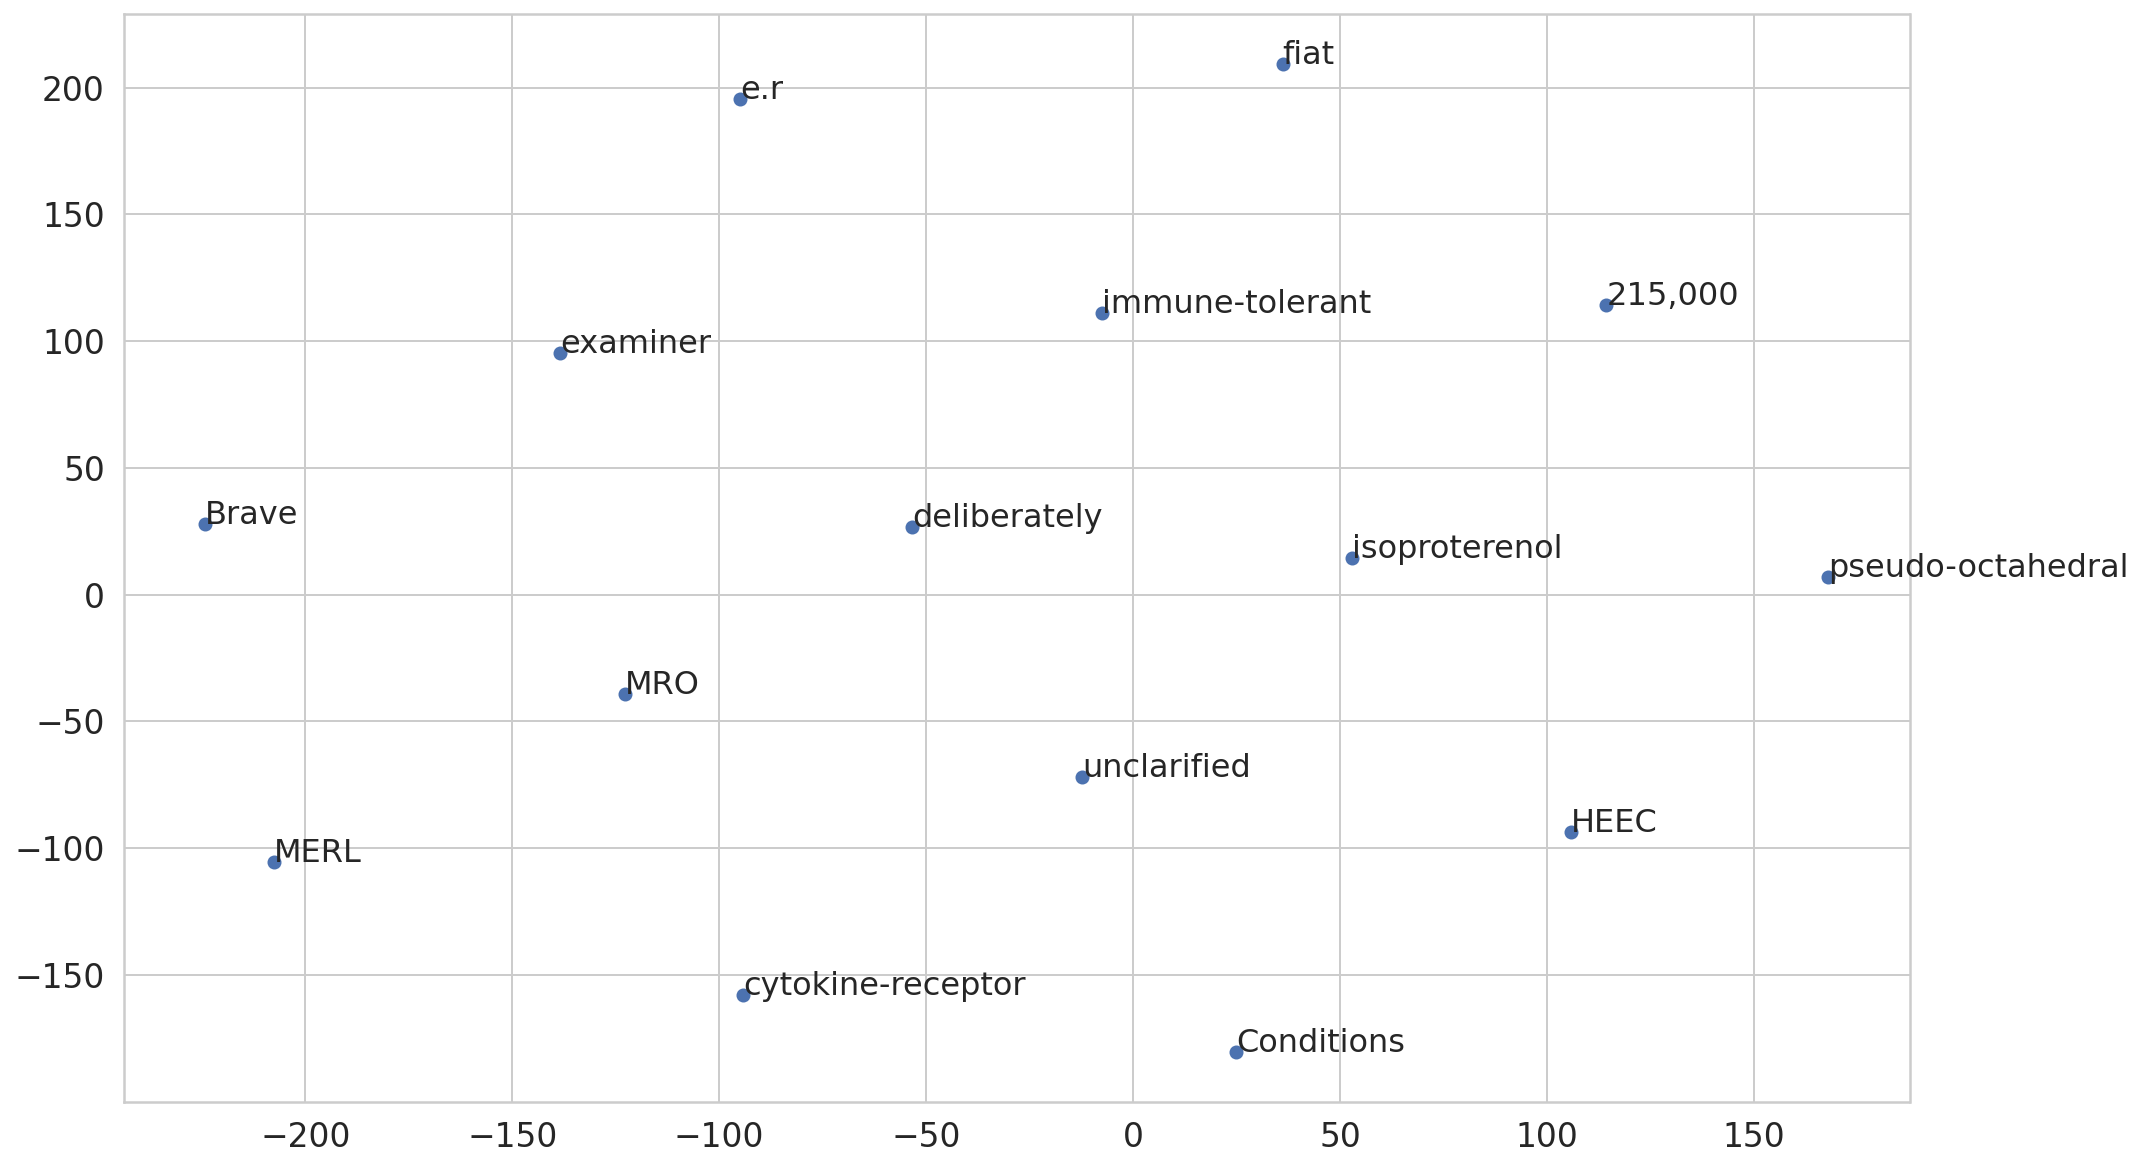

In [117]:
#plot_most_similar(nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer'])
plt.rcParams["figure.figsize"] = (16,10) 
plt.rcParams.update({'font.size': 16})
plot_most_similar(lst = ['melanoma, carcinoma'], n=15,nlp = nlp_bc5)

In [96]:

# TODO: Enter code here to solve the analogy problem
from sklearn.metrics.pairwise import cosine_similarity

def fourth(a,b,c):
  nlp = nlp_bc5
  d = np.array((nlp.vocab[a].vector - nlp.vocab[b].vector)+ nlp.vocab[c].vector)
  ids = [x for x in nlp.vocab.vectors.keys()]
  vectors = np.array([nlp.vocab.vectors[x] for x in ids])
  # *** Find the word with greatest cosine similarity ***
  cos_sim = cosine_similarity(d.reshape(1,200), vectors)
  index = cos_sim.argmax()
  word_id = ids[index]
  output_word = (nlp.vocab[word_id].text)
  return output_word

In [105]:
print(fourth('cancer', 'carcinoma','hMC1R	'))
print(fourth('cancer', 'PCa','CtIP'))
# print(fourth('better','good','bad'))
# print(fourth('walked','walk','take'))
# print(fourth('bigger','big','small'))


cardiovascular
53BP1


## Analogies

# Unsupervised approach for interaction words identification using pattern clustering

In [11]:
nlp = en_core_sci_lg.load()

In [34]:
def preprocess(text):
  text = re.sub(r'[^\w\s]','',text) # remove punctuations
  doc = nlp(text)
  token_words = []
  for token in doc:
    if not token.is_stop:
      token_words.append(token.lemma_)
  token_words = [x for x in token_words if len(x) >= 2]
  return token_words

In [ ]:
preprocess(data['Text'][1])

### TF-IDF vectorizer

In [54]:
vectorizer = CountVectorizer(tokenizer=preprocess,max_df=0.95)
X = vectorizer.fit_transform(data['Text'])
vocabulary = vectorizer.vocabulary_
feature_names = vectorizer.get_feature_names()

# svd = TruncatedSVD(100)
# normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)
# x = lsa.fit_transform(X)

In [53]:
print(len(feature_names))
X.shape

61003


(11118, 61003)

In [42]:
# create coocuurance matrix
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) #np.fill_diagonal(Xc, 0)
X_svd = lsa.fit_transform(Xc)

In [43]:
X_svd

array([[ 8.67964979e-01, -3.47749916e-02,  2.12370685e-02, ...,
         2.11986324e-04,  1.45124284e-02,  3.49327490e-02],
       [ 2.47147302e-01, -1.91637096e-01,  8.41187066e-02, ...,
         8.62355676e-02, -8.78038710e-02, -1.15892821e-01],
       [ 6.14749378e-01, -2.89054328e-01, -1.20705734e-01, ...,
         3.15577201e-02, -5.18217120e-02,  2.46298871e-02],
       ...,
       [ 3.85807723e-01, -3.00989668e-01,  2.37793366e-01, ...,
         2.70305314e-01, -4.73269202e-02, -4.77134703e-02],
       [ 5.95928664e-01, -2.83210809e-01,  2.39905202e-02, ...,
        -4.93378718e-02, -3.15521112e-02,  4.26959416e-02],
       [ 3.82587245e-01, -1.81409118e-01, -8.34224736e-02, ...,
        -3.62529528e-02, -6.02731520e-02,  1.20432110e-02]])

In [ ]:
best_fearures = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
Xc.shape
len(feature_names)
best_fearures

In [ ]:
df1 = pd.DataFrame(X_svd,columns=best_fearures[0:100] )
df1
df1.to_csv('to_gephi.csv', sep = ',')
#files.download()

In [ ]:
feature_names[9000:]

##Porting and Displaying on Gephi as a Network Graph

In [ ]:
len(best_fearures[0:100])

100

# Co occurrance analysis

In [ ]:
import cocoscore

In [ ]:
data = ' '.join(df['Text'])

In [ ]:
!./fasttext skipgram -input data.txt -output model

/bin/bash: ./fasttext: No such file or directory


# Open Infromation Extraction

In [ ]:
!pip install stanford-openie

In [62]:
from openie import StanfordOpenIE

with StanfordOpenIE() as client:
    text = 'Barack Obama was born in Hawaii. Richard Manning wrote this sentence.'
    print('Text: %s.' % text)
    for triple in client.annotate(text):
        print('|-', triple)

    graph_image = 'graph.png'
    client.generate_graphviz_graph(text, graph_image)
    print('Graph generated: %s.' % graph_image)

    with open('corpus/pg6130.txt', 'r', encoding='utf8') as r:
        corpus = r.read().replace('\n', ' ').replace('\r', '')

    triples_corpus = client.annotate(corpus[0:50000])
    print('Corpus: %s [...].' % corpus[0:80])
    print('Found %s triples in the corpus.' % len(triples_corpus))
    for triple in triples_corpus[:3]:
        print('|-', triple)


Extracting to /root/stanfordnlp_resources.
Text: Barack Obama was born in Hawaii. Richard Manning wrote this sentence..
Starting server with command: java -Xmx8G -cp /root/stanfordnlp_resources/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-b018dd97b6004a22.props -preload openie


PermanentlyFailedException: ignored